In [1]:
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.colors import ListedColormap
from turbo_colormap import *
import inspect
import os
import csv 
import time
import sys
import glob
import pandas as pd
from pprint import pprint
import re
# RegEx module

from tvb.simulator.lab import *
from tvb.simulator.plot.tools import *

# Input Simulation Pipeline
from SimulationPipeline import *
from useful_fns import *

matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

# Sweep of Sig_I and Sig_e for 2nd Order Het 

In [2]:
# SCorr_files = glob.glob(r"D:\Simulations\2020_09_18\*Scorr*.csv")
#SCorr_files = glob.glob(r"D:\Simulations\2020_09_23\LCycle*Scorr*.csv")
#SCorr_files = glob.glob(r"D:\Simulations\2020_09_23\FixedPt*Scorr*.csv")
#SCorr_files = glob.glob(r"D:\Simulations\2020_09_23\Hysteresis*Scorr*.csv")

Regime = "LCycle"

#SCorr_files = glob.glob(r"D:\Simulations\2020_10_09\\" + Regime +"*Scorr*.csv") # Jump 
#SCorr_files = glob.glob(r"D:\Simulations\\2020_09_10\\" + Regime + "*Scorr*.csv") # 1.2e6 old LCycleCut
#SCorr_files = glob.glob(r"D:\Simulations\\2020_10_11\\" + Regime + "*Scorr*.csv") # LCycleCut
#SCorr_files = glob.glob(r"D:\Simulations\\2020_10_25\\" + Regime + "*Scorr*.csv") # Different Het Gradient
#SCorr_files = glob.glob(r"D:\Simulations\\2020_10_27\\" + Regime + "*Scorr*.csv") # Different Het Gradient - LCycleCutOld and Jump
#SCorr_files = glob.glob(r"D:\Simulations\\2020_10_29\\" + Regime + "*Scorr*.csv") # 1st Het Gradient - LCycleCutOld - 1.2e5
SCorr_files = glob.glob(r"D:\Simulations\\2020_10_31\\" + Regime + "*Scorr*.csv") # Het Gradient applied to a_e and a_i - LCycleCutOld - 1.2e5


print(SCorr_files)

ycleCutOld_G[1.95]sig_e5sig_i1.0_MouseCortex_Scorr_20201101-035137_.csv', 'D:\\Simulations\\\\2020_10_31\\LCycleCutOld_G[1.9]sig_e0.0sig_i0.0_MouseCortex_Scorr_20201031-065937_.csv', 'D:\\Simulations\\\\2020_10_31\\LCycleCutOld_G[1.9]sig_e0.0sig_i0.2_MouseCortex_Scorr_20201031-070632_.csv', 'D:\\Simulations\\\\2020_10_31\\LCycleCutOld_G[1.9]sig_e0.0sig_i0.4_MouseCortex_Scorr_20201031-071336_.csv', 'D:\\Simulations\\\\2020_10_31\\LCycleCutOld_G[1.9]sig_e0.0sig_i0.6000000000000001_MouseCortex_Scorr_20201031-072003_.csv', 'D:\\Simulations\\\\2020_10_31\\LCycleCutOld_G[1.9]sig_e0.0sig_i0.8_MouseCortex_Scorr_20201031-072623_.csv', 'D:\\Simulations\\\\2020_10_31\\LCycleCutOld_G[1.9]sig_e0.0sig_i1.0_MouseCortex_Scorr_20201031-073234_.csv', 'D:\\Simulations\\\\2020_10_31\\LCycleCutOld_G[1.9]sig_e0.2sig_i0.0_MouseCortex_Scorr_20201031-073848_.csv', 'D:\\Simulations\\\\2020_10_31\\LCycleCutOld_G[1.9]sig_e0.2sig_i0.2_MouseCortex_Scorr_20201031-074458_.csv', 'D:\\Simulations\\\\2020_10_31\\LCycleC

In [3]:
Params = []
SCFC = []
FCFC = []
for string in SCorr_files:

    # Obtain Parameter Values
    #x = re.findall("\[(.*)\]sig_e(...).*sig_i(...)",string)
    x = re.findall("\[(.*)\]sig_e(.).*sig_i(...)",string)
    Params.append(x[0])

    # FCFC and SCFC
    a = np.genfromtxt(string)
    SCFC.append(a[0])
    FCFC.append(a[2])

df = pd.DataFrame(Params)
df.columns = ['G','sig_e', 'sig_i']
df["SCFC"] = SCFC
df["FCFC"] = FCFC

In [4]:
df = df.sort_values(["FCFC"])
df.tail(20)

,G,sig_e,sig_i,SCFC,FCFC
516,0.7,2,0.0,0.490889,0.577449
558,0.85,3,0.0,0.380036,0.579430
541,0.85,0,0.2,0.386368,0.580604
552,0.85,2,0.0,0.373279,0.581397
506,0.7,0,0.4,0.474618,0.582616
553,0.85,2,0.2,0.394244,0.583012
510,0.7,1,0.0,0.480115,0.586140
588,0.8,2,0.0,0.393897,0.588527
577,0.8,0,0.2,0.408006,0.589212
578,0.8,0,0.4,0.405809,0.590640


In [5]:
df.loc[df['FCFC'].idxmax()]

G            0.75
sig_e           1
sig_i         0.2
SCFC     0.434416
FCFC     0.611197
Name: 475, dtype: object

In [6]:
df_pivot = df.sort_values('FCFC').drop_duplicates(['sig_e','sig_i'],keep='last').pivot(index='sig_e', columns='sig_i', values='FCFC')
df_pivot = df_pivot.sort_values('sig_e',ascending=False)
print(df_pivot)
# Reason why we need to do this is because the clsuter did something bad and simulated a few points multiple times (this is likely from it deciding to stop runs midway and then restarting)

sig_i       0.0       0.2       0.4       0.6       0.8       1.0
sig_e                                                            
5      0.530491  0.528604  0.507522  0.508458  0.514759  0.485335
4      0.535874  0.559874  0.551405  0.520713  0.525304  0.512935
3      0.579430  0.550555  0.570103  0.546592  0.546205  0.531164
2      0.600976  0.583012  0.557554  0.542663  0.554398  0.554061
1      0.599918  0.611197  0.567822  0.539388  0.533675  0.543826
0      0.563658  0.597023  0.598914  0.567864  0.560063  0.539200


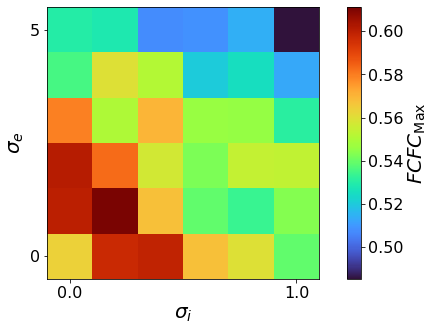

In [7]:
#ListedColormap(turbo_colormap_data) ,vmin=0,vmax=0.65
cs=plt.imshow(df_pivot, cmap=ListedColormap(turbo_colormap_data), aspect='equal', interpolation='none')
#plt.title(Regime + ' Heterogeneous Regime - $FCFC_{\mathrm{Max}}', fontsize=20)
axcb=plt.colorbar(cs)
axcb.set_label('$FCFC_{\mathrm{Max}}$', fontsize=20)
axcb.ax.tick_params(labelsize=16)
plt.yticks(ticks=np.arange(len(df_pivot.index))[::5],labels=df_pivot.index[::5], fontsize=16)
plt.xticks(ticks=np.arange(len(df_pivot.columns))[::5],labels=df_pivot.columns[::5], fontsize=16)
plt.xlabel("$\sigma_i$", fontsize=20)
plt.ylabel("$\sigma_e$", fontsize=20)
plt.savefig("do-not-track\\" + Regime +"_Hetsweep.pdf",bbox_inches='tight')
plt.show()

In [38]:
Regime = "LCycle"

SCorr_files = glob.glob(r"D:\Simulations\\2020_10_29\\" + Regime + "*Scorr*.csv") # 1st Het Gradient - LCycleCutOld - 1.2e5

Params = []
SCFC = []
FCFC = []
for string in SCorr_files:

    # Obtain Parameter Values
    x = re.findall("\[(.*)\]sig_e(...).*sig_i(...)",string)
    #x = re.findall("\[(.*)\]sig_e(.).*sig_i(...)",string)
    Params.append(x[0])

    # FCFC and SCFC
    a = np.genfromtxt(string)
    SCFC.append(a[0])
    FCFC.append(a[2])

df = pd.DataFrame(Params)
df.columns = ['G','sig_e', 'sig_i']
df["SCFC"] = SCFC
df["FCFC"] = FCFC

In [28]:
df.iloc[df["sig_e"]==df["sig_i"]]

NotImplementedError: iLocation based boolean indexing on an integer type is not available

In [32]:
df["sig_i"]=="0.2"

0       False
1        True
2       False
3       False
4       False
        ...  
1111     True
1112    False
1113    False
1114    False
1115    False
Name: sig_i, Length: 1116, dtype: bool

In [44]:
df = df[df["sig_e"]==df["sig_i"]]
print(df_2D)

         G sig_e sig_i      SCFC      FCFC
0     0.05   0.0   0.0  0.479639  0.286351
7     0.05   0.2   0.2  0.474816  0.274605
14    0.05   0.4   0.4  0.481521  0.318852
21    0.05   0.6   0.6  0.466389  0.337856
28    0.05   0.8   0.8  0.463065  0.342296
...    ...   ...   ...       ...       ...
1087    1.   0.2   0.2  0.225766  0.396427
1094    1.   0.4   0.4  0.188375  0.333838
1101    1.   0.6   0.6  0.208890  0.290751
1108    1.   0.8   0.8  0.215642  0.326153
1115    1.   1.0   1.0  0.221285  0.346746

[186 rows x 5 columns]


In [49]:
df_pivot = df.pivot(index='sig_e', columns='G', values='FCFC')
df_pivot = df_pivot.sort_values('sig_e',ascending=False)
print(df_pivot)
# Reason why we need to do this is because the clsuter did something bad and simulated a few points multiple times (this is likely from it deciding to stop runs midway and then restarting)

G            0.      0.05       0.1      0.15       0.2      0.25       0.3  \
sig_e                                                                         
1.0    0.044010  0.297731  0.353367  0.324170  0.339052  0.381561  0.381664   
0.8    0.049929  0.342296  0.360314  0.299532  0.273532  0.257675  0.278409   
0.6    0.065880  0.337856  0.344368  0.257586  0.212148  0.223880  0.247228   
0.4    0.046649  0.318852  0.310287  0.179109  0.150648  0.158487  0.149521   
0.2    0.028251  0.274605  0.307425  0.182779  0.142916  0.115800  0.127508   
0.0    0.027185  0.286351  0.349521  0.224129  0.146579  0.131494  0.133020   

G          0.35       0.4      0.45  ...      1.05       1.1      1.15  \
sig_e                                ...                                 
1.0    0.394945  0.383428  0.405865  ...  0.333534  0.318944  0.299642   
0.8    0.318766  0.372721  0.407355  ...  0.320434  0.307939  0.291319   
0.6    0.256968  0.299339  0.344749  ...  0.269585  0.254921  0.237822 

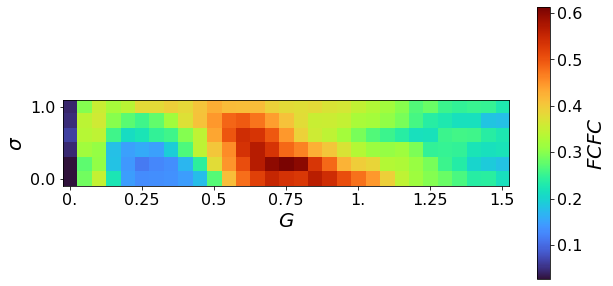

In [53]:
#ListedColormap(turbo_colormap_data) ,vmin=0,vmax=0.65
cs=plt.imshow(df_pivot, cmap=ListedColormap(turbo_colormap_data), aspect='equal', interpolation='none')
#plt.title(Regime + ' Heterogeneous Regime - $FCFC_{\mathrm{Max}}', fontsize=20)
axcb=plt.colorbar(cs)
axcb.set_label('$FCFC$', fontsize=20)
axcb.ax.tick_params(labelsize=16)
plt.yticks(ticks=np.arange(len(df_pivot.index))[::5],labels=df_pivot.index[::5], fontsize=16)
plt.xticks(ticks=np.arange(len(df_pivot.columns))[::5],labels=df_pivot.columns[::5], fontsize=16)
plt.xlabel("$G$", fontsize=20)
plt.ylabel("$\sigma$", fontsize=20)
#plt.savefig("do-not-track\\" + Regime +"_Hetsweep.pdf",bbox_inches='tight')
plt.show()

In [ ]:
# Well that looks suspiciously like a certain homogenous sweep... Though we havent swept enough to tell.